In [51]:
# Analisi diffusione COVID-19 nel mondo Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; 
# a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, 
# all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; 
# alla voce "🗂 dataset" scaricare il dataset nel formato che si preferisce. 

import pandas as pd
df=pd.read_csv("C:\\Users\\annun\\Downloads\\Progetto Finale Epicode\\owid-covid-data.csv")

# • Si richiede di verificare le dimensioni del dataset e i relativi metadati; Download our complete COVID-19
df.shape
df.columns
df["continent"].unique()
print(df.columns)


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [92]:
# • Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
    # si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente; 

# Escludo le righe in cui sono assenti i valori per continente
df = df.dropna(subset=['continent'])
df["continent"].unique()   
# Raggruppo e sommo i dati dei casi totali come da richiesta
Totale_continenti=df[["continent","total_cases"]].groupby("continent").sum('total_cases')
Totale_continenti
print(Totale_continenti)

                total_cases
continent                  
Africa         1.351276e+10
Asia           2.268447e+11
Europe         2.155291e+11
North America  1.166456e+11
Oceania        1.034003e+10
South America  6.771490e+10


In [94]:
# • Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, 
# ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo 
# (calcolati anche sulle locazioni senza indicazione di continente); 

def confronto_continenti(df,continent1,continent2):
    def percentage(series):
        return (series.sum() / df['total_cases'].sum()) * 100
    
    # Filtro i dati per ciascun continente
    df_cont1 = df[df['continent'] == continent1]
    df_cont2 = df[df['continent'] == continent2]
    
    # Calcolo i valori statistici richiesti per ciascun continente
    stats_cont1 = df_cont1['total_cases'].agg(['mean', 'max', percentage])
    stats_cont2 = df_cont2['total_cases'].agg(['mean', 'max', percentage])
    
    # Creo un dataframe con i risultati
    result = pd.DataFrame({
        continent1: stats_cont1,
        continent2: stats_cont2
    })

    return result

#Esempio
confronto_continenti(df,"Africa","Asia")

Africa          Asia
mean        1.581883e+05  3.312037e+06
max         4.072684e+06  9.935648e+07
percentage  2.077010e+00  3.486770e+01

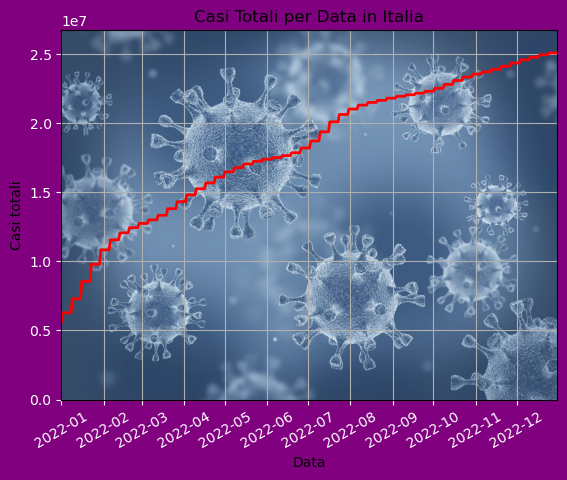

In [139]:
# • Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
from PIL import Image
from io import BytesIO
import pandas as pd

Italia=df.loc[(df["location"]=="Italy")][["date","total_cases"]]
Italia["total_cases"]=Italia["total_cases"].fillna(0)
Italia['date'] = pd.to_datetime(Italia['date'])
Italia['date'] = Italia[(Italia['date'] >= '2022-01-01') & (Italia['date'] <= '2022-12-31')]['date'] 


# Indico l'indirizzo dell'immagine scelta come sfondo da internet
url = 'https://cdn.georgeinstitute.org/sites/default/files/styles/width1920_fallback/public/2020-03/covid.jpg'

# Carico l'immagine
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Creo un grafico e imposto l'immagine come sfondo customizzando i range e la cornice
fig, ax = plt.subplots(facecolor='purple')
ax.imshow(img, extent=[Italia['date'].min(), Italia['date'].max(), Italia['total_cases'].min(), Italia['total_cases'].max()], aspect='auto')  


# Creo il grafico usando i dati del DataFrame
ax.plot(Italia['date'], Italia["total_cases"], 'r-', linewidth=2)

# Imposto i limiti degli assi basati sui dati
ax.set_xlim(Italia['date'].min(), Italia['date'].max())
ax.set_ylim(Italia['total_cases'].min(), Italia['total_cases'].max())

#Modifico ulteriormente il grafico 

plt.gca().set_facecolor('lightgrey')  
plt.gca().tick_params(axis='x', colors='white')  
plt.gca().tick_params(axis='y', colors='white')

# Titolo e etichette
plt.title('Casi Totali per Data in Italia')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.grid(True)

# Ruotare le etichette dell'asse x
plt.xticks(rotation=30)

# Mostrare il grafico
plt.show()

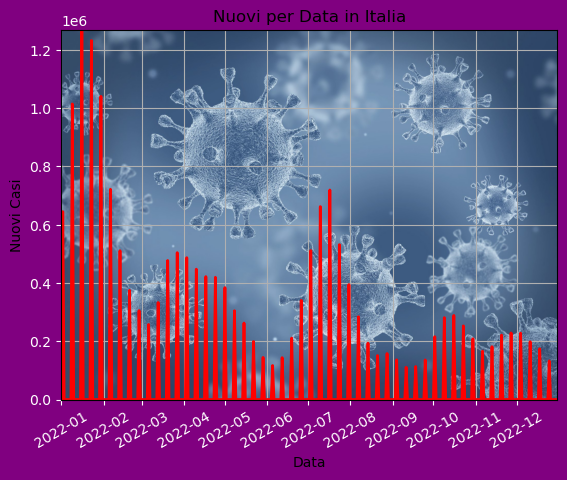

In [436]:
# Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario)
    #rispetto ai grafici precedenti, cambiano i dati da richiamare o il tipo di grafico scelto, per eventuali commenti considerare lo script precedente
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
from PIL import Image
from io import BytesIO
import pandas as pd

Italia=df.loc[(df["location"]=="Italy")][["date","new_cases"]]
Italia["new_cases"]=Italia["new_cases"].fillna(0)
Italia['date'] = pd.to_datetime(Italia['date'])
Italia['date'] = Italia[(Italia['date'] >= '2022-01-01') & (Italia['date'] <= '2022-12-31')]['date'] 
url = 'https://cdn.georgeinstitute.org/sites/default/files/styles/width1920_fallback/public/2020-03/covid.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
fig, ax = plt.subplots(facecolor='purple')
ax.imshow(img, extent=[Italia['date'].min(), Italia['date'].max(), Italia['new_cases'].min(), Italia['new_cases'].max()], aspect='auto')
ax.plot(Italia['date'], Italia["new_cases"], 'r-', linewidth=2)
ax.set_xlim(Italia['date'].min(), Italia['date'].max())
ax.set_ylim(Italia['new_cases'].min(), Italia['new_cases'].max())
plt.gca().set_facecolor('lightgrey')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white') 
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

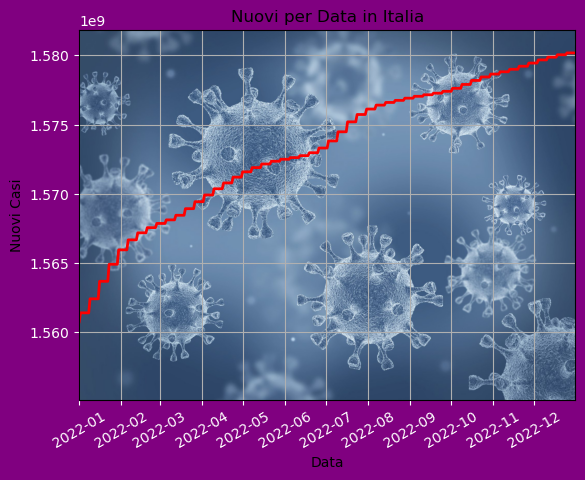

In [442]:
# Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
from PIL import Image
from io import BytesIO
import pandas as pd

Italia=df.loc[(df["location"]=="Italy")][["date","new_cases"]]
Italia["new_cases"]=Italia["new_cases"].fillna(0)
Italia["new_cases"]= df['new_cases'].cumsum()
Italia['date'] = pd.to_datetime(Italia['date'])
Italia['date'] = Italia[(Italia['date'] >= '2022-01-01') & (Italia['date'] <= '2022-12-31')]['date'] 
url = 'https://cdn.georgeinstitute.org/sites/default/files/styles/width1920_fallback/public/2020-03/covid.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
fig, ax = plt.subplots(facecolor='purple')
ax.imshow(img, extent=[Italia['date'].min(), Italia['date'].max(), Italia['new_cases'].min(), Italia['new_cases'].max()], aspect='auto') 
ax.plot(Italia['date'], Italia["new_cases"], 'r-', linewidth=2) 
ax.set_xlim(Italia['date'].min(), Italia['date'].max())
ax.set_ylim(Italia['new_cases'].min(), Italia['new_cases'].max())
plt.gca().set_facecolor('lightgrey') 
plt.gca().tick_params(axis='x', colors='white') 
plt.gca().tick_params(axis='y', colors='white') 
plt.title('Nuovi per Data in Italia')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.grid(True)
plt.xticks(rotation=30)
plt.show()

#e commentare se ci sono similarità con l'andamento del numero dei casi totali;
   #l'andamento è similare, cambia il valore totale

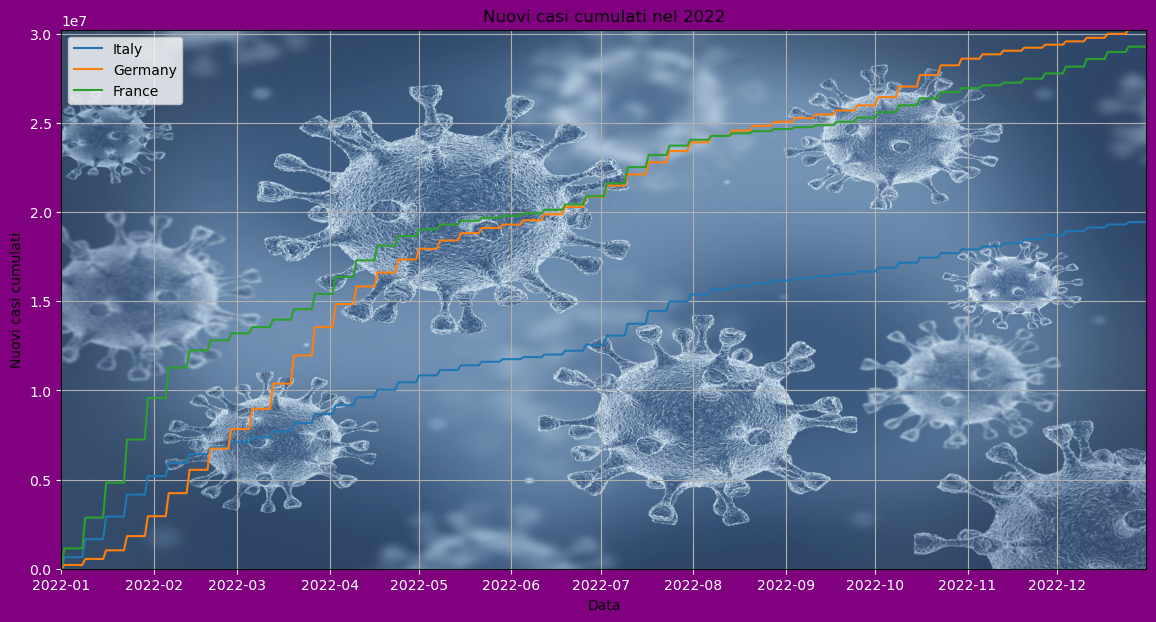

In [586]:
# • Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image
import requests
from io import BytesIO


url = 'https://cdn.georgeinstitute.org/sites/default/files/styles/width1920_fallback/public/2020-03/covid.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
df['date'] = pd.to_datetime(df['date']) 
df_2022 = df[(df['date'].dt.year == 2022) & (df['location'].isin(['Italy', 'Germany', 'France']))].copy()
df_2022.loc[:, 'cumulative_new_cases'] = df_2022.groupby('location')['new_cases'].cumsum()
plt.figure(figsize=(14, 7),facecolor='purple')
plt.imshow(img, aspect='auto', extent=[df_2022['date'].min(), df_2022['date'].max(), 0, df_2022['cumulative_new_cases'].max()])
for country in ['Italy', 'Germany', 'France']:
    country_data = df_2022[df_2022['location'] == country]
    plt.plot(country_data['date'], country_data['cumulative_new_cases'], label=country, zorder=2)
    plt.gca().set_facecolor('lightgrey')  
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.title('Nuovi casi cumulati nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi cumulati')
plt.legend()
plt.grid(True)
plt.show()

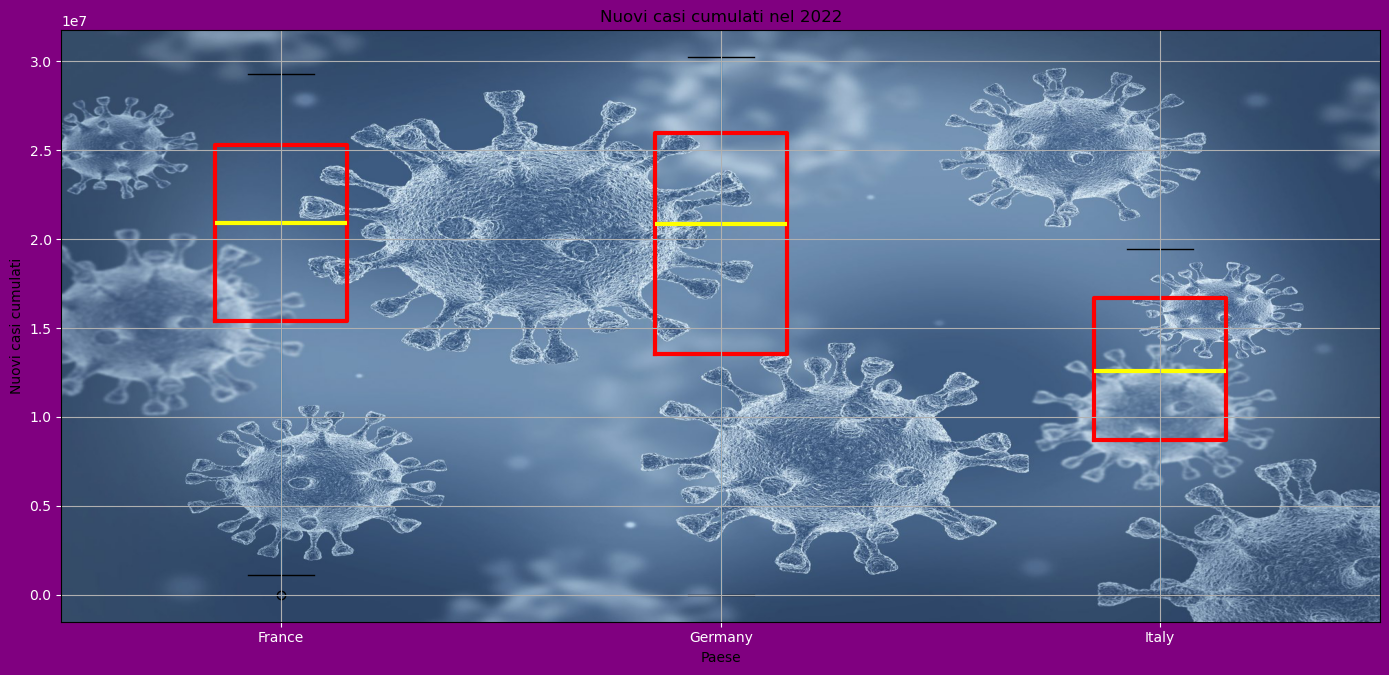

In [76]:
# • Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO


url = 'https://cdn.georgeinstitute.org/sites/default/files/styles/width1920_fallback/public/2020-03/covid.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
df['date'] = pd.to_datetime(df['date'])
df_2022 = df[(df['date'].dt.year == 2022) & (df['location'].isin(['Italy', 'Germany', 'France']))].copy()
df_2022.loc[:, 'cumulative_new_cases'] = df_2022.groupby('location')['new_cases'].cumsum()
plt.figure(figsize=(14, 7), facecolor='purple')
boxprops = dict(color='red', linewidth=3)
medianprops = dict(color='yellow', linewidth=3)
df_2022.boxplot(column='cumulative_new_cases', by='location', ax=plt.gca(), grid=True, zorder=1, boxprops=boxprops, medianprops=medianprops)
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.imshow(img, aspect='auto', extent=[xlim[0], xlim[1], ylim[0], ylim[1]], zorder=0)
plt.gca().set_facecolor('lightgrey')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.title('Nuovi casi cumulati nel 2022')
plt.xlabel('Paese')
plt.ylabel('Nuovi casi cumulati')
plt.suptitle('')
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
#Controllo preventivo dei dati, in virtu' della richiesta del prossimo esercizio:
df_2023 = df[(df['date'].dt.year == 2023) & (df['location'].isin(['Italy', 'Germany', 'France']))]
df_2023.loc[df_2023["location"]=="France"]['hosp_patients'].max()
df_2023.loc[df_2023["location"]=="Italy"]['hosp_patients'].max()

8409.0

In [16]:
#Setto a 0 i valori assensi per Francia
df['date'] = pd.to_datetime(df['date'])
df.loc[(df['date'].dt.year == 2023) & (df['location'].isin(['France']))]["new_cases"].fillna(0)

121830    151707.0
121831         0.0
121832         0.0
121833         0.0
121834         0.0
            ...   
122190         0.0
122191         0.0
122192         0.0
122193         0.0
122194         0.0
Name: new_cases, Length: 365, dtype: float64

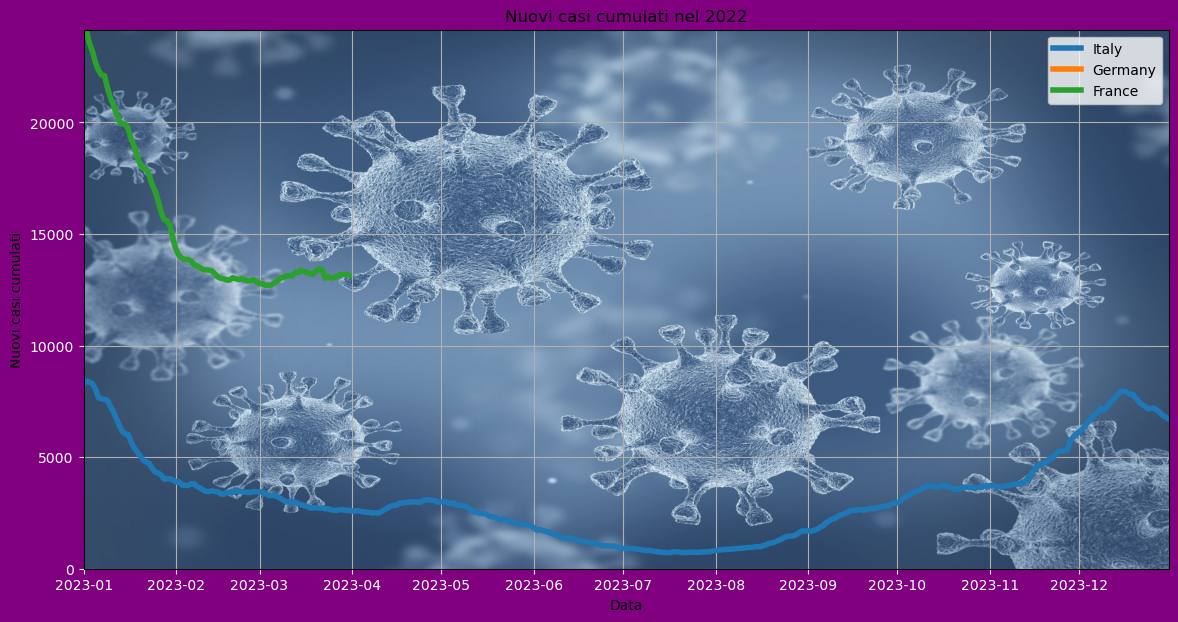

In [113]:
# • Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, 
# mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, 


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image
import requests
from io import BytesIO


url = 'https://cdn.georgeinstitute.org/sites/default/files/styles/width1920_fallback/public/2020-03/covid.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
df['date'] = pd.to_datetime(df['date'])
df_2023 = df[(df['date'].dt.year == 2023) & (df['location'].isin(['Italy', 'Germany', 'France']))].copy()
plt.figure(figsize=(14, 7),facecolor='purple')
plt.imshow(img, aspect='auto', extent=[df_2023['date'].min(), df_2023['date'].max(), 0, df_2023['hosp_patients'].max()])
for country in ['Italy', 'Germany', 'France']:
    country_data = df_2023[df_2023['location'] == country]
    plt.plot(country_data['date'], country_data['hosp_patients'], label=country, zorder=2, linewidth=4)
    plt.gca().set_facecolor('lightgrey')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.title('Nuovi casi cumulati nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi cumulati')
plt.legend()
plt.grid(True)
plt.show()

# suggerire se può essere possibile gestirli tramite sostituzione o meno.
    #i dati mancanti potrebbero esser desunti da analisi statistiche o ulteriori dataset ricercati online (se esistenti).
    #volendo solo basarsi sull'andamento degli ultimi anni, si può comunque notare un andamento costante (vedere grafico in basso)

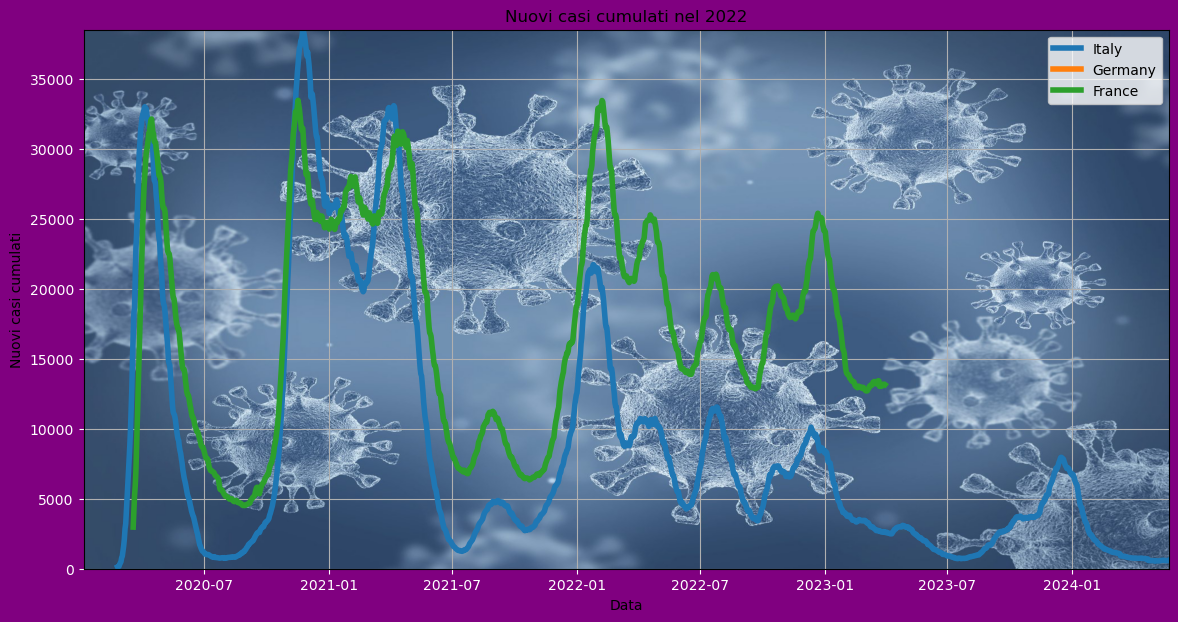

In [117]:
# • Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, 
# mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, 


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image
import requests
from io import BytesIO


url = 'https://cdn.georgeinstitute.org/sites/default/files/styles/width1920_fallback/public/2020-03/covid.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
df['date'] = pd.to_datetime(df['date'])
df_2023 = df[df['location'].isin(['Italy', 'Germany', 'France'])].copy()
plt.figure(figsize=(14, 7),facecolor='purple')
plt.imshow(img, aspect='auto', extent=[df_2023['date'].min(), df_2023['date'].max(), 0, df_2023['hosp_patients'].max()])
for country in ['Italy', 'Germany', 'France']:
    country_data = df_2023[df_2023['location'] == country]
    plt.plot(country_data['date'], country_data['hosp_patients'], label=country, zorder=2, linewidth=4)
    plt.gca().set_facecolor('lightgrey')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.title('Nuovi casi cumulati nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi cumulati')
plt.legend()
plt.grid(True)
plt.show()

# Emerge come tra le due location vi è un andamento similare e come non vi siano dati della Germania

In [137]:
Germany=df.loc[(df["location"]=="Germany")][["hosp_patients"]].fillna(0)
Germany.groupby("hosp_patients")["hosp_patients"].sum()

hosp_patients
0.0    0.0
Name: hosp_patients, dtype: float64